## Visualize results

In [1]:
using Revise
using Distributions
using LinearAlgebra
using JLD2
using Plots;
using TuePlots; 
theme(:default;
    TuePlots.get_plotsjl_theme_kwargs(
        TuePlots.SETTINGS[:ProbNum25];
        fontsize = true,
        figsize = true,
    )...)


In [2]:
# Number of repetitions
num_reps = 10

# Time settings
Δt = 0.1
len_times = 2 .^collect(3:10)
num_times = length(len_times)

# Preallocate result arrays
runtimes_MML = zeros(num_times, num_reps)
runtimes_HMC = zeros(num_times, num_reps)
runtimes_AR1 = zeros(num_times, num_reps)

# Collect results
for (nn,len_time) in enumerate(len_times)
    lt = lpad(len_time, 5, '0')

    res = load("results/runtimes-AR1-lentime$lt.jld2")
    runtimes_MML[nn,:] = res["runtimes_MML"]
    runtimes_HMC[nn,:] = res["runtimes_HMC"]
    runtimes_AR1[nn,:] = res["runtimes_AR1"]
       
end

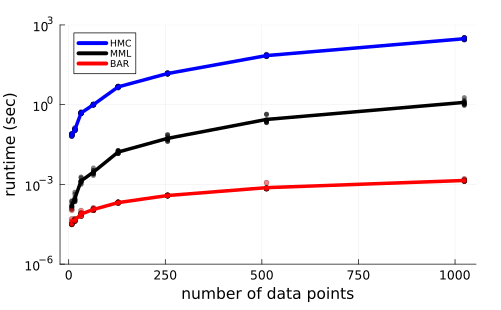

In [ ]:
plot(xlabel="number of data points", ylabel="runtime (sec)", legend=:topleft, yscale=:log10)
for (k,len_time) in enumerate(len_times)
    scatter!(len_time*ones(num_reps), runtimes_MML[k,:], color="black", alpha=0.5, label="")
    scatter!(len_time*ones(num_reps), runtimes_HMC[k,:], color="blue", alpha=0.5, label="")
    scatter!(len_time*ones(num_reps), runtimes_AR1[k,:], color="red", alpha=0.5, label="")
end
plot!(len_times, mean(runtimes_HMC,dims=2), linewidth=5, color="blue", alpha=1., label="HMC", ylims=(0,1.), margin=20Plots.pt)
plot!(len_times, mean(runtimes_MML,dims=2), linewidth=5, color="black", alpha=1., label="MML", ylims=(0,1.), margin=20Plots.pt)
plot!(len_times, mean(runtimes_AR1,dims=2), linewidth=5, color="red", alpha=1., label="BAR", ylims=(0,1.), margin=20Plots.pt)
plot!(ylims=(1e-6,1e3), guidefontsize=15, tickfontsize=12)

In [ ]:
savefig("figures/runtimes-sim-AR1.pdf")